In [195]:
import numpy as np
import matplotlib.pyplot as plt
weight=[95,75,23,73,50,22,6,57,89,98]
value=[89,59,19,43,100,72,44,16,7,64]
n=50
l=len(value)
volume=300                                                         #背包容量
group=np.random.randint(0,2,(50,l))                                  #随机生成一些群组
m=100
p_c=0.75
p_m=0.05
mh=25

def tweight(a,weight):
    fit_w=0
    for i in range(l):
        fit_w+=a[i]*weight[i]
    return fit_w

def overweight(group):                                                  #拿哪个物品
    random=np.random.randint(0,10)
    group[random]=0

def takeout(group):
    for i in range(n):                                                 #将超重的拿出来
        while tweight(group[i],weight)>volume:
            overweight(group[i])  

def funvalue(a,value):                                               #适应度函数
    fit_v=0
    for i in range(l):
        fit_v+=a[i]*value[i]
    return fit_v

def probability(group):                                              #可能性
    P=[]
    total_fit=0
    for i in range(n):
        total_fit+=funvalue(group[i],value)
    for i in range(n):
        P.append(funvalue(group[i],value)/total_fit)
    return P

def pro_plus(P):                                                     #可能性叠加
    P_p=[]
    Pplus=0
    for i in range(n):
        Pplus+=P[i]
        P_p.append(Pplus)
    return P_p


def select(group):                                                  #从种群里选
    P=probability(group)
    Pp=pro_plus(P)
    ran=[0]*n
    group_new=[[0]*l]*n
    for i in range(n):
        ran[i]=np.random.rand()
        for j in range(n):
            if ran[i]<Pp[j]:
                group_new[i]=group[j][:]
                break
    return group_new

def change(code,p_c):                                             #配对交叉函数                                               
    sp=np.random.randint(0,l)                                     #顺序生成
    ran=np.random.rand()
    code1=[]
    for i in range(mh):
        if ran<p_c:
            temp1=[]
            temp2=[]
            temp1.extend(code[2*i][0:sp])
            temp1.extend(code[2*i+1][sp:l])
            temp2.extend(code[2*i+1][0:sp])
            temp2.extend(code[2*i][sp:l])
            code1.append(temp1)
            code1.append(temp2)
        else:
            temp1=[]
            temp2=[]
            temp1.extend(code[2*i][:])
            temp2.extend(code[2*i+1][:])
            code1.append(temp1)
            code1.append(temp2)
    takeout(code1)
    return code1

def mutation(code,p_m):
    for i in range(n):
        random=np.random.rand()
        if random<p_m:
            s=np.random.randint(0,l)
            if code[i][s]==0:
                code[i][s]=1
            else:
                code[i][s]=0
    takeout(code)
    return code
takeout(group)
for i in range(n):
    print(funvalue(group[i],value))

186
258
85
131
335
42
207
256
339
240
107
335
133
226
114
138
206
256
167
196
238
342
185
164
321
223
153
336
186
116
42
79
258
257
212
234
130
234
143
178
232
138
158
299
298
283
275
231
201
176


In [196]:
P=[]  
def inherit(group,n,p_c,p_m):                             #画图
    code1=[[0]*l]*n
    maxfit=0
    maxnum=[0]*l
    for i in range(m):
        group_new=select(group)
        code1=change(group_new,p_c)
        code1=mutation(code1,p_m)
        group=code1[:]
        for i in range(n):
            if funvalue(group[i],value)>maxfit:
                maxfit=funvalue(group[i],value)
                maxnum=group[i] 
        P.append(maxfit)
    return maxfit,maxnum
print(inherit(group,n,p_c,p_m))

(388, [1, 0, 1, 0, 1, 1, 1, 0, 0, 1])


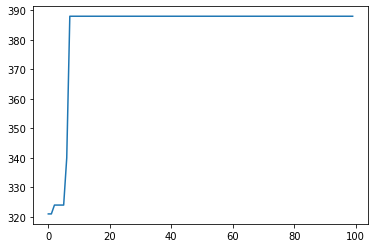

In [197]:
plt.plot(P)
plt.show()